In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

#df = pd.read_csv("NYC_Collisions.csv", parse_dates=["Date"], index_col ="Date")
df = pd.read_csv("NYC_Collisions.csv")
# CONCAT TWO COLUMNS
df["DateTime"] = df["Date"]+" "+df["Time"]
# PARSE DATATIME
df["DateTime"] = pd.to_datetime(df["DateTime"])
print(df.columns)
print("\n------------\n")
print(df.info())
print("\n------------\n")
print(df.iloc[0])
print("\n------------\n")
print("Null Date ", df['Date'].isnull().sum())
print("Null Time ", df['Time'].isnull().sum())
print("Null Cross Street ", df['Cross Street'].isnull().sum())
print("Null Borough ", df['Borough'].isnull().sum())
print("Null Latitude ", df['Latitude'].isnull().sum())
print("Null Longitude ", df['Longitude'].isnull().sum())
print("Null Contributing Factor ", df['Contributing Factor'].isnull().sum())
print("Null Vehicle Type ", df['Vehicle Type'].isnull().sum())
print("\n------------\n")
# DROP COLUMN
print("\nDROP COLUMN\n")
df.drop(["Cross Street"], axis =1, inplace = True)
# print(df.info())
# print("\n------------\n")
# DROP NULL
print("\nDROP NULL\n")
# df.dropna(inplace=True)
# print(df.info())
# print("\n------------\n")
# print(df.loc[:0, ['Borough', 'Latitude', 'Longitude']])

Index(['Collision ID', 'Date', 'Time', 'Borough', 'Street Name',
       'Cross Street', 'Latitude', 'Longitude', 'Contributing Factor',
       'Vehicle Type', 'Persons Injured', 'Persons Killed',
       'Pedestrians Injured', 'Pedestrians Killed', 'Cyclists Injured',
       'Cyclists Killed', 'Motorists Injured', 'Motorists Killed', 'DateTime'],
      dtype='object')

------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238421 entries, 0 to 238420
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Collision ID         238421 non-null  int64         
 1   Date                 238421 non-null  object        
 2   Time                 238421 non-null  object        
 3   Borough              231224 non-null  object        
 4   Street Name          238058 non-null  object        
 5   Cross Street         111291 non-null  object        
 6   Latitude             216098 non-nul

In [2]:
# df.groupby(pd.Grouper(key='Date', freq='2YE')).sum()
# df.plot(kind = 'scatter', x = 'Date', y = 'Persons Killed')
# plt.show()
# df["Date"] = pd.to_datetime(df["Date"])
# df["Date"].head
# df2 = df.groupby(pd.Grouper(key='Date', freq='YE'))
# df.plot(x = 'Date', y = 'Persons Killed', figsize=(20, 10))
# plt.title('Scatter Plot')
# plt.show()
# df2 = killed_date.groupby(pd.Grouper(key='Date', freq='ME'))
# df2 = df.groupby([df.index.year])["Persons Killed"].sum()
# print(df.shape)
# df2 = df[["Date", "Persons Killed"]]
# print(df2.shape)
# df3 = df["Date"]
# print(df3.shape)
# df2.info()
# df.Date.info()

# print(persons_killed.shape)
# print(persons_killed)
# persons_killed.info()
borough = df.groupby(df["Borough"])["Borough"]
borough.describe()
vehicle_type = df.groupby(df["Vehicle Type"])["Vehicle Type"]
vehicle_type.describe()

count unique                     top    freq
Vehicle Type                                                         
Bicycle                   4978      1                 Bicycle    4978
Bus                       3864      1                     Bus    3864
Construction               811      1            Construction     811
Delivery Vehicle          1540      1        Delivery Vehicle    1540
Emergency Services        1701      1      Emergency Services    1701
Fire Services              185      1           Fire Services     185
Limousine                   92      1               Limousine      92
Motorcycle                1805      1              Motorcycle    1805
Not Reported              1986      1            Not Reported    1986
Other                     1154      1                   Other    1154
Other (Open Passenger)       7      1  Other (Open Passenger)       7
Passenger Vehicle       182390      1       Passenger Vehicle  182390
Scooter                   1940      1                 Scooter    1940
Taxi                      5456      1                    Taxi    5456
Transport                 5894      1               Transport    5894
Unknown                     19      1                 Unknown      19
Utility Vehicle            775      1         Utility Vehicle     775

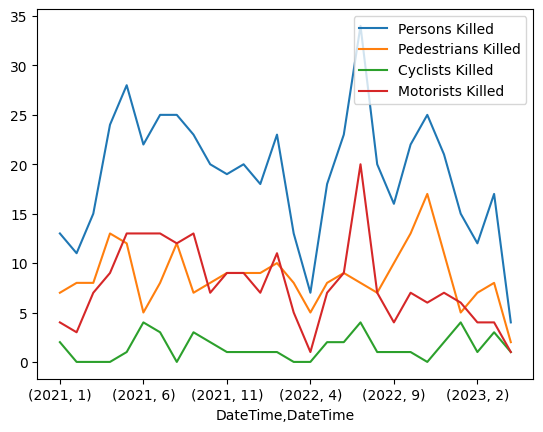

In [3]:
persons_killed = df.groupby([df["DateTime"].dt.year, df["DateTime"].dt.month])["Persons Killed"].sum()
pedestrians_killed = df.groupby([df["DateTime"].dt.year, df["DateTime"].dt.month])["Pedestrians Killed"].sum()
cyclists_killed = df.groupby([df["DateTime"].dt.year, df["DateTime"].dt.month])["Cyclists Killed"].sum()
motorists_killed = df.groupby([df["DateTime"].dt.year, df["DateTime"].dt.month])["Motorists Killed"].sum()

persons_killed.plot(x='Date', y='Persons Killed', legend=True)
pedestrians_killed.plot(x='Date', y='Pedestrians Killed', legend=True)
cyclists_killed.plot(x='Date', y='Pedestrians Killed', legend=True)
motorists_killed.plot(x='Date', y='Motorists Killed', legend=True)
plt.show()

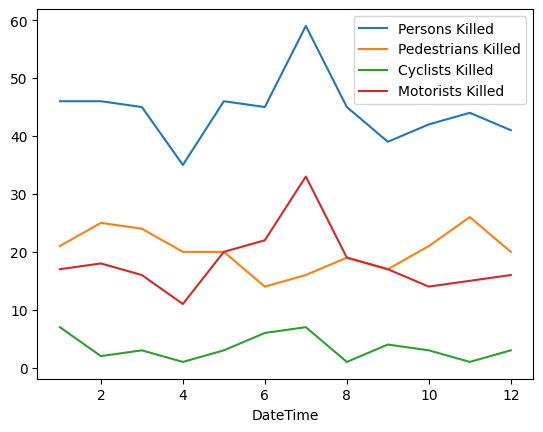

In [4]:
persons_killed = df.groupby([df["DateTime"].dt.month])["Persons Killed"].sum()
pedestrians_killed = df.groupby([df["DateTime"].dt.month])["Pedestrians Killed"].sum()
cyclists_killed = df.groupby([df["DateTime"].dt.month])["Cyclists Killed"].sum()
motorists_killed = df.groupby([df["DateTime"].dt.month])["Motorists Killed"].sum()

persons_killed.plot(x='Date', y='Persons Killed', legend=True)
pedestrians_killed.plot(x='Date', y='Pedestrians Killed', legend=True)
cyclists_killed.plot(x='Date', y='Pedestrians Killed', legend=True)
motorists_killed.plot(x='Date', y='Motorists Killed', legend=True)
plt.show()

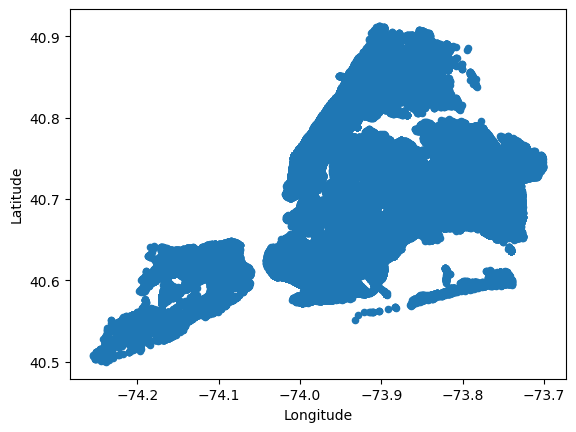

In [5]:
lat_long = df[["Latitude", "Longitude"]]
# lat_long.plot.scatter(y='Latitude', x='Longitude')
lat_long.plot(y='Latitude', x='Longitude', kind="scatter")
# df.plot(y='Latitude', x='Longitude', kind="scatter")
plt.show()

In [6]:
print(lat_long["Latitude"].min())
print(lat_long["Latitude"].max())
print(lat_long["Longitude"].min())
print(lat_long["Longitude"].max())

40.49971
40.912884
-74.25496
-73.70061


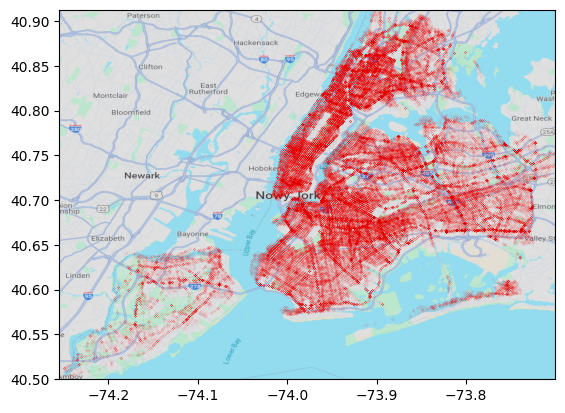

In [7]:
img = plt.imread("map.png")
fig, ax = plt.subplots() # figsize=(20, 10)
img = ax.imshow(img, extent=[-74.25496, -73.70061, 40.49971, 40.912884])
#lat_long_killed.plot.scatter(y='Latitude', x='Longitude', legend=True)
ax.scatter(lat_long["Longitude"], lat_long["Latitude"], color='red', s=0.0005, alpha=1)
plt.show()

In [8]:
lat_long_hour = df[["Latitude", "Longitude", "DateTime"]].copy()
lat_long_hour["Hour"] = lat_long_hour["DateTime"].dt.hour
# print(lat_long_datetime["DateTime"].dt.time.min())
# print(lat_long_datetime["DateTime"].dt.time.max())
# print(lat_long_datetime.groupby(lat_long_datetime["DateTime"].dt.hour).size())
# print("\n------------\n")
# print(lat_long_datetime.groupby(lat_long_datetime["DateTime"].dt.hour).head())
# print("\n------------\n")
# print(lat_long_datetime.groupby(lat_long_datetime["DateTime"].dt.hour).first())

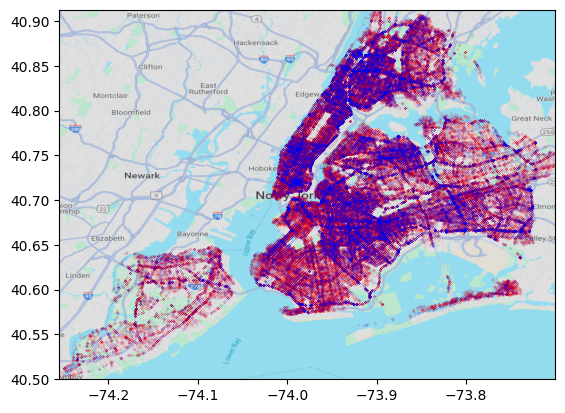

In [9]:
img = plt.imread("map.png")
fig, ax = plt.subplots() # figsize=(20, 10)
img = ax.imshow(img, extent=[-74.25496, -73.70061, 40.49971, 40.912884])

ax.scatter(lat_long_hour.loc[lat_long_hour["Hour"].between(6,20), "Longitude"], 
           lat_long_hour.loc[lat_long_hour["Hour"].between(6,20), "Latitude"], 
           s=0.005, 
           c='red')
ax.scatter(lat_long_hour.loc[(lat_long_hour["Hour"] < 6) | (lat_long_hour["Hour"] >20), "Longitude"], 
           lat_long_hour.loc[(lat_long_hour["Hour"] < 6) | (lat_long_hour["Hour"] >20), "Latitude"], 
           s=0.005, 
           c='blue')
# ax.scatter(lat_long_datetime["Longitude"], lat_long_datetime["Latitude"], s=0.0005, c='blue')
# fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(lat_long_datetime["DateTime"].min().value, 
#                                                              lat_long_datetime["DateTime"].max().value), cmap='viridis'), 
#              ax=ax, orientation='vertical', label='a colorbar label')
plt.show()

<Axes: xlabel='Vehicle Type', ylabel='Num collisions'>

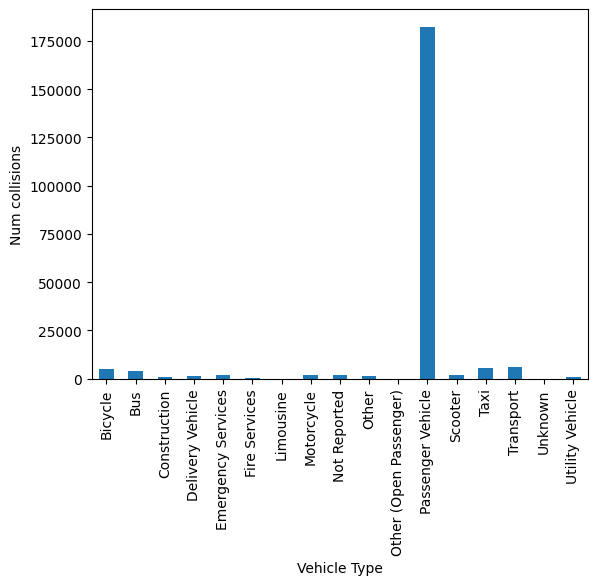

In [10]:
vehicle_type = df.groupby(df["Vehicle Type"])["Vehicle Type"].count()
vehicle_type.plot(kind='bar', ylabel='Num collisions')


In [10]:
borough = df.loc[:, ['Borough', 'Latitude', 'Longitude']].copy()
print(borough.groupby(borough['Borough'])['Borough'].count())
print('\n------- NULLS\n')
print('Borough', borough['Borough'].isnull().sum())
print('Latitude', borough['Latitude'].isnull().sum())
print('Latitude', borough['Latitude'].isnull().sum())
print('\n-------\n')
print(borough.count())
print('\n-------\n')
borough.dropna(inplace=True)
borough.count()
print('\n-------\n')
borough.info()

Borough
Bronx            41255
Brooklyn         76416
Manhattan        38234
Queens           63751
Staten Island    11568
Name: Borough, dtype: int64

------- NULLS

Borough 7197
Latitude 22323
Latitude 22323

-------

Borough      231224
Latitude     216098
Longitude    216098
dtype: int64

-------


-------

<class 'pandas.core.frame.DataFrame'>
Index: 216098 entries, 0 to 238420
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Borough    216098 non-null  object 
 1   Latitude   216098 non-null  float64
 2   Longitude  216098 non-null  float64
dtypes: float64(2), object(1)
memory usage: 6.6+ MB


In [9]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# importing required packages for visualization
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz

# putting feature variable to x
x = borough.drop(['Borough'], axis=1)
# putting target variable to y
y = borough['Borough']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x_train, x_test, y_train, y_test

(         Latitude  Longitude
 233650  40.697258 -73.805750
 196813  40.609642 -73.897380
 148490  40.763126 -73.831250
 219141  40.692516 -73.859110
 187351  40.759540 -73.984375
 ...           ...        ...
 43669   40.635120 -73.929634
 212895  40.649060 -73.913260
 117264  40.713620 -73.830380
 136607  40.844753 -73.905390
 37754   40.753040 -73.934906
 
 [151268 rows x 2 columns],
          Latitude  Longitude
 19016   40.763200 -73.921090
 162914  40.748985 -73.979965
 111415  40.720280 -73.963135
 12667   40.683395 -73.970900
 50748   40.736958 -74.006510
 ...           ...        ...
 140199  40.712105 -73.739240
 191158  40.865936 -73.830414
 7782    40.809500 -73.935830
 141869  40.715820 -73.807990
 99173   40.707190 -73.818730
 
 [64830 rows x 2 columns],
 233650       Queens
 196813     Brooklyn
 148490       Queens
 219141       Queens
 187351    Manhattan
             ...    
 43669      Brooklyn
 212895     Brooklyn
 117264       Queens
 136607        Bronx
 37754     

In [11]:
dt_borough = DecisionTreeClassifier()
dt_borough.fit(x_train, y_train)

DecisionTreeClassifier()

In [12]:
y_pred_train = dt_borough.predict(x_train)

In [13]:
print(classification_report(y_train, y_pred_train))

               precision    recall  f1-score   support

        Bronx       1.00      1.00      1.00     26579
     Brooklyn       1.00      1.00      1.00     51013
    Manhattan       1.00      1.00      1.00     25153
       Queens       1.00      1.00      1.00     41191
Staten Island       1.00      1.00      1.00      7332

     accuracy                           1.00    151268
    macro avg       1.00      1.00      1.00    151268
 weighted avg       1.00      1.00      1.00    151268



In [14]:
print(confusion_matrix(y_train, y_pred_train))
print(accuracy_score(y_train, y_pred_train))

[[26575     0     4     0     0]
 [    0 51007     0     6     0]
 [    2     0 25151     0     0]
 [    0    31     0 41160     0]
 [    0     0     0     0  7332]]
0.9997157363090674


In [16]:
y_pred_default = dt_borough.predict(x_test)

In [17]:
print(classification_report(y_test, y_pred_default))

               precision    recall  f1-score   support

        Bronx       1.00      1.00      1.00     11203
     Brooklyn       1.00      1.00      1.00     21992
    Manhattan       1.00      1.00      1.00     10803
       Queens       1.00      1.00      1.00     17733
Staten Island       1.00      1.00      1.00      3099

     accuracy                           1.00     64830
    macro avg       1.00      1.00      1.00     64830
 weighted avg       1.00      1.00      1.00     64830



In [18]:
print(confusion_matrix(y_test, y_pred_default))
print(accuracy_score(y_test, y_pred_default))

[[11197     0     6     0     0]
 [    0 21983     1     8     0]
 [    7     0 10796     0     0]
 [    0    24     3 17706     0]
 [    0     0     0     0  3099]]
0.999244177078513


In [25]:
import pydotplus

features = list(x_train.columns)
dot_data = StringIO()
export_graphviz(dt_borough, out_file=dot_data, feature_names=features, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# graph.write_pdf('borough.pdf') # file saved to currunt working directory
Image(graph.create_png())

In [37]:
y_pred = dt_borough.predict([[40.68, -73.97]])
y_pred

/root/Studia/python/analiza_danych/.venv/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Brooklyn'], dtype=object)

In [39]:
x_df = pd.DataFrame([[40.68, -73.97]], columns=['Latitude','Longitude'])
y_pred = dt_borough.predict(x_df)
y_pred

array(['Brooklyn'], dtype=object)